In [1]:
# imports
from sqlalchemy import create_engine, Column, String, Integer, Numeric, MetaData, Table, type_coerce
from sqlalchemy.orm import mapper, create_session
import csv
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
import numbers
from sqlalchemy.sql import and_, or_, not_
from sqlalchemy.sql import select
%matplotlib inline

In [2]:
# definitions
file1='salish/salish_prof.csv'

In [3]:
engine = create_engine('sqlite:///salishDB.sqlite')

In [4]:
table = None
metadata = MetaData(bind=engine)

In [5]:
class forceNumeric(types.TypeDecorator):

    impl = types.Numeric

    def process_bind_param(self, value, dialect):
        try:
            int(float(value))
        except:
            value = None
        return value

class forceInt(types.TypeDecorator):
    
    impl = types.Integer
    def process_bind_param(self, value, dialect):
        try:
            int(value)
        except:
            value = None
        return value


In [6]:
def coltype(ikey):
    typedict = {
        'DATA_TYPE': String(),
        'CR_NUMBER': String(),
        'D_P_CODE': String(),
    }
    return typedict.get(ikey, forceNumeric())
    

In [7]:
with open(file1) as f:
    cf = csv.DictReader(f, delimiter=',')
    for row in cf:
        if table is None:
            table = Table('profiles', metadata, Column('id', Integer, primary_key=True),
                *(Column(rowname, coltype(rowname)) for rowname in row.keys()))
            table.create()
        table.insert().values(**row).execute()
class Profs(object): pass
mapper(Profs, table)

<Mapper at 0x10cae40b8; Profs>

In [8]:
session = create_session(bind = engine, autocommit = False, autoflush = True)

In [9]:
#sal=case([(Profs.SSAL!=None, Profs.SSAL)], else_=Profs.PSAL)
#data=session.query(sal, Profs.NTRA).all()
#.filter(Profs.DEPTH_PRESS>100).filter(Profs.DEPTH_PRESS!=None),.filter(sal!=None).filter(Profs.NTRA!=None)
data=session.query(Profs.Q_DATE_TIME).filter(Profs.CR_NUMBER=='18DD12014 ').filter(Profs.OBS_TIME==724).all()
print(data)


[(None,), (None,), (None,), (None,), (None,), (None,)]


/usr/local/lib/python3.5/site-packages/sqlalchemy/sql/sqltypes.py:562: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


In [40]:
sal=case([(Profs.SSAL!=None, Profs.SSAL)], else_=Profs.PSAL)
qsal=case([(Profs.SSAL!=None, Profs.Q_SSAL)], else_=Profs.Q_PSAL)
data=session.query(sal, Profs.NTRA)
print('Q_SAL')
print(session.query(qsal).group_by(qsal).all())
print('Q_NO3')
print(session.query(Profs.Q_NTRA).group_by(Profs.Q_NTRA).all())
NO=[]
S=[]
for m, n in data.all():
    S.append(m)
    NO.append(n)

Q_SAL
[(None,), (Decimal('0E-10'),), (Decimal('1.0000000000'),), (Decimal('2.0000000000'),), (Decimal('3.0000000000'),), (Decimal('4.0000000000'),)]
Q_NO3
[(None,), (Decimal('1.0000000000'),), (Decimal('3.0000000000'),), (Decimal('4.0000000000'),)]


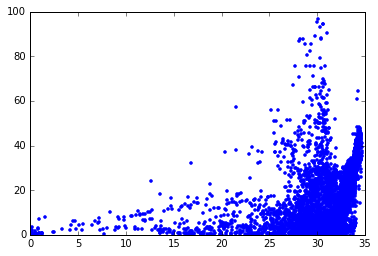

In [41]:
plt.plot(S,NO,'.')
plt.show()

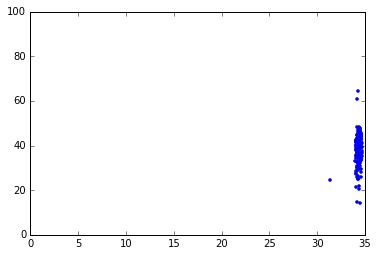

In [54]:
data2=session.query(sal, Profs.NTRA).filter(Profs.DEPTH_PRESS>400)
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([0,35,0,100])
plt.plot(S,NO,'.')

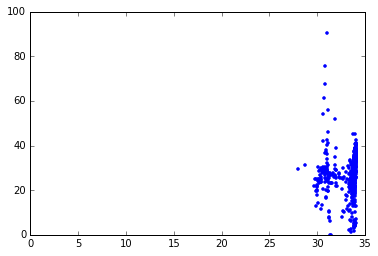

In [56]:
data2=session.query(sal, Profs.NTRA).filter(and_(Profs.DEPTH_PRESS<400,Profs.DEPTH_PRESS>100))
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([0,35,0,100])
plt.plot(S,NO,'.')

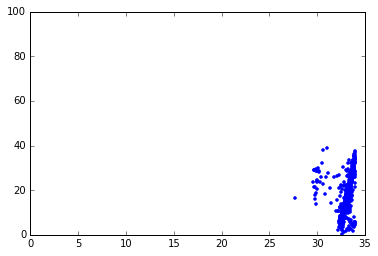

In [57]:
data2=session.query(sal, Profs.NTRA).filter(and_(Profs.DEPTH_PRESS<100,Profs.DEPTH_PRESS>50))
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([0,35,0,100])
plt.plot(S,NO,'.')

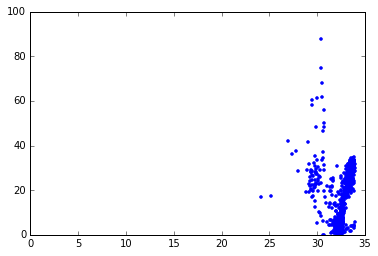

In [58]:
data2=session.query(sal, Profs.NTRA).filter(and_(Profs.DEPTH_PRESS<50,Profs.DEPTH_PRESS>25))
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([0,35,0,100])
plt.plot(S,NO,'.')

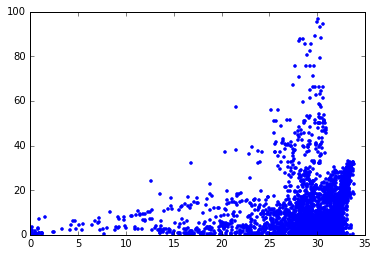

In [59]:
data2=session.query(sal, Profs.NTRA).filter(and_(Profs.DEPTH_PRESS<25,Profs.DEPTH_PRESS>=0))
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([0,35,0,100])
plt.plot(S,NO,'.')

In [67]:
s=session.query(Profs.OBS_YEAR, Profs.OBS_MONTH, Profs.DEPTH_PRESS, Profs.PSAL, Profs.NTRA).filter(
    and_(
        Profs.LATITUDE > 48.3,
        Profs.LATITUDE < 48.8,
        Profs.LONGITUDE < 125.2,
        Profs.LONGITUDE > 124.3,
        Profs.NTRA != 'NaN'
        ))


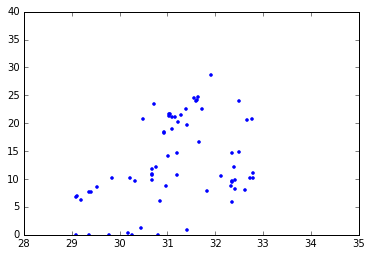

In [95]:
data2=session.query(sal, Profs.NTRA).filter(
    and_(
        Profs.LATITUDE > 48.3,
        Profs.LATITUDE < 48.8,
        Profs.LONGITUDE < 125.2,
        Profs.LONGITUDE > 124.3,
        ))
NO=[]
S=[]
for m, n in data2.all():
    S.append(m)
    NO.append(n)
    
plt.axis([28,35,0,40])
plt.plot(S,NO,'.')

In [ ]:
s=select([prof.c.OBS_YEAR, prof.c.OBS_MONTH, prof.c.DEPTH_PRESS, prof.c.PSAL, prof.c.SSAL, prof.c.NTRA]).where(
    and_(
        prof.c.LATITUDE > 48.3,
        prof.c.LATITUDE < 48.8,
        prof.c.LONGITUDE < 125.2,
        prof.c.LONGITUDE > 124.3,
        prof.c.NTRA != 'NaN',
        or_(
            prof.c.PSAL !='NaN',
            prof.c.SSAL !='NaN'
            )
        ))
results=conn.execute(s).fetchall()
print(results[1])

In [ ]:
conn.close()
engine.dispose()